# Matrix operations for matrices, for which each entry is a function $f_{i,j} : \mathbb{R} \to \mathbb{R}$
## Implementation of an (point-wise) addition and multiplication of such matrices 


#### Some imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec


The Code part:

In [830]:
import re
from sympy import symbols, sympify

def separate_variable(variable):
    
    if isinstance(variable, (int, float)):
        return float(variable), None
    
    else:
        pattern = r'([-+]?\d*\.?\d*)(\w+)'
        match = re.match(pattern, variable)
        if match:
            coefficient = match.group(1)
            variable = match.group(2)
            if coefficient == '':
                coefficient = '1'
            return float(coefficient), variable
        else:
            return None

def check_variable(variable):
    result = ""
    i = 0
    while i < len(variable):
        if variable[i].isdigit() and i < len(variable) - 1 and variable[i + 1].isalpha():
            result += variable[i] + "*"
        elif variable[i].isalpha() and i < len(variable) - 1 and variable[i + 1].isdigit():
            result += variable[i] + "*"
        else:
            result += variable[i]
        i += 1
    return result


def complex_values(f, g):
    f1 = sympify(check_variable(str(f)))
    f2 = sympify(check_variable(str(g)))
    variables = list(f1.free_symbols.union(f2.free_symbols))

    
    # Assign default values to missing variables in expr2
    missing_variables = set(variables) - set(f2.free_symbols)
    default_values = {var: 0 for var in missing_variables}
    f2 = f2.subs(default_values)
    
    return f1, f2

        
def add(f, g):
    if len(f) != len(g) or len(f[0]) != len(g[0]):
        raise ValueError("Cannot add matrices of different dimensions.")

    m_output = []
    for i in range(len(f)):
        m_output.append([])
        for j in range(len(f[0])):
            f1, f2 = complex_values(f[i][j], g[i][j])
            m_output[i].append(f1+f2)

    return m_output


def subtract(f, g):
  
    if len(f) != len(g) or len(f[0]) != len(g[0]):
        raise ValueError("Cannot add matrices of different dimensions.")

    m_output = []
    for i in range(len(f)):
        m_output.append([])
        for j in range(len(f[0])):
            f1, f2 = complex_values(f[i][j], g[i][j])
            m_output[i].append(f1-f2)

    return m_output


        
def multiply(f, g):
    
    if isinstance(f, (int, float)) or isinstance(f, (str)):
        m_output = []
        for r in range(len(g)):
            m_row = []
            for c in range(len(g[0])):
                f1, f2 = complex_values(f, g[r][c])
                m_row.append(f1*f2)
            m_output.append(m_row)
        return m_output
    
    elif isinstance(g, (int, float)) or isinstance(g, (str)):
        m_output = []
        for r in range(len(f)):
            m_row = []
            for c in range(len(f[0])):
                f1, f2 = complex_values(f[r][c], g)
                m_row.append(f1*f2)
            m_output.append(m_row)
        return m_output

    else:
        if len(f[0]) != len(g):
            raise ValueError("Incompatible dimensions for matrix multiplication.")
        m_output = []
        for i in range(len(f)):
            m_row = []
            for j in range(len(g[0])):
                cell = 0
                var = ''
                for k in range(len(f[0])):
                    f1, f2 = complex_values(f[i][k], g[k][j])
                    m_row.append(f1*f2)
            m_output.append(m_row)

        return m_output
    
def determinant(f):
    if len(f) != len(f[0]):
        raise ValueError("Determinant can be calculated only for square matrix")
    if len(f) == 2:
        det_output = sympify(check_variable(str(f[0][0]))) * sympify(check_variable(str(f[1][1]))) - sympify(check_variable(str(f[1][0]))) * sympify(check_variable(str(f[0][1])))
        return det_output

    else:
        def det_recursive(rec_matrix):
            rec_output = 0
            idx = list(range(len(rec_matrix)))

            if len(rec_matrix) == 2 and len(rec_matrix[0]) == 2:
                rec_output = sympify(check_variable(str(rec_matrix[0][0]))) * sympify(check_variable(str(rec_matrix[1][1]))) - sympify(check_variable(str(rec_matrix[1][0]))) * sympify(check_variable(str(rec_matrix[0][1])))
                return rec_output

            for col in idx:
                new_matrix = rec_matrix
                new_matrix = new_matrix[1:]

                for i in range(len(new_matrix)):
                    new_matrix[i] = new_matrix[i][0:col] + new_matrix[i][col + 1:]

                sign = (-1) ** (col % 2)
                SubFun = det_recursive(new_matrix)
                rec_output += sympify(check_variable(str(sign))) * sympify(check_variable(str(rec_matrix[0][col]))) * sympify(check_variable(str(SubFun)))

            return rec_output

        return det_recursive(f)

In [783]:


def add_functions(f, g):
    return lambda x: f(x) + g(x)
def multiply_functions(f, g):
    return lambda x: f(x) * g(x)



def validate_function(in_1: np.ndarray,in_2:np.ndarray, op) -> np.ndarray or None:
    try:
        assert in_1.shape == in_2.shape
        return in_1, in_2
    except AssertionError:
        print(f'The shapes of the two matrices you want to operate on, must be equivalent,',
        'which they are not.')
        ans = input('Would you like to use padding to solve this problem? Then please answer with <Yes>: ')
        if ans == 'Yes' or ans == '<Yes>':
            if op == add_functions:
                fill_func = np.array([lambda x: x*0])
            elif op == multiply_functions:
                fill_func = np.array([lambda x: x**0])
            if in_1.shape[0] <= in_2.shape[0] and in_1.shape[1] <= in_2.shape[1]:
                matrix = fill_func.repeat(in_2.size).reshape(in_2.shape)
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
            elif in_1.shape[0] >= in_2.shape[0] and in_1.shape[1] <= in_2.shape[1]:
                matrix = fill_func.repeat(in_1.shape[0]*in_2.shape[1]).reshape((in_1.shape[0], in_2.shape[1]))
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
                matrix = fill_func.repeat(in_1.shape[0]*in_2.shape[1]).reshape((in_1.shape[0], in_2.shape[1]))
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            elif in_1.shape[0] >= in_2.shape[0] and in_1.shape[1] >= in_2.shape[1]:
                matrix = fill_func.repeat(in_1.size).reshape(in_1.shape)
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            elif in_1.shape[0] <= in_2.shape[0] and in_1.shape[1] >= in_2.shape[1]:
                matrix = fill_func.repeat(in_2.shape[0]*in_1.shape[1]).reshape((in_2.shape[0], in_1.shape[1]))
                matrix[0:len(in_1), 0:len(in_1[0])] = in_1
                in_1 = matrix
                matrix = fill_func.repeat(in_2.shape[0]*in_1.shape[1]).reshape((in_2.shape[0], in_1.shape[1]))
                matrix[0:len(in_2), 0:len(in_2[0])] = in_2
                in_2 = matrix
            return in_1, in_2
        else:
            raise ValueError('Due to incompatibility problems the operation of these two matrices',
                    'is not defined and will therefore be stopped.')

def point_wise_operation(in_1: np.ndarray,in_2:np.ndarray, op) -> np.ndarray:
    
    """This function takes 3 input arguments: two matrices which have entries that are functions and one operator.
        It returns a matrix of the point wise implementation of the operator on the 2 matrices that were given as the input arguments."""

    dimension_check = validate_function(in_1, in_2, op)
    in_1, in_2 = dimension_check
    output = np.ndarray(shape=(len(in_1), len(in_2[0])), dtype=object)
    for i in range(len(in_1)):
        for j in range(len(in_2[0])):
            output[i][j] = op(in_1[i][j], in_2[i][j])
    return output
    

Test Part for matrices with the same dimensions:

In [ ]:
m1 = np.array([[lambda x: x, lambda x: x**2 +5 ], [lambda x: x**3, lambda x: x**4]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m3 = point_wise_operation(m1, m2, add_functions)
print(m3)

In [832]:
MA = ([['3x+2',3,5], [5,5,8]])
MB = ([[3,9,7], [9,6,1]])
MQ = ([['a',9,8], [9,5,5], [9,2,1]])
MD = ([[5,5,8], [1,6,3], [2,3,5]])
MT = ([['x',5,8], [1,6,3], [2,3,5]])
MH = ([[3,5], [5,'d']])


MKd = multiply(MA,MT)
print(MKd)
MKs = add(MA,MB)
print(MKs)
MKn = multiply(MA,'3g')
print(MKn)

MKdd = determinant(MQ)
print(MKdd)

[[x*(3*x + 2), 3, 10, 15*x + 10, 18, 15, 24*x + 16, 9, 25], [5*x, 5, 16, 25, 30, 24, 40, 15, 40]]
[[3*x + 5, 12, 12], [14, 11, 9]]
[[3*g*(3*x + 2), 9*g, 15*g], [15*g, 15*g, 24*g]]


[[<function add_functions.<locals>.<lambda> at 0x00000176D86079D0>
  <function add_functions.<locals>.<lambda> at 0x00000176D8607940>]
 [<function add_functions.<locals>.<lambda> at 0x00000176D86070D0>
  <function add_functions.<locals>.<lambda> at 0x00000176D8607040>]]


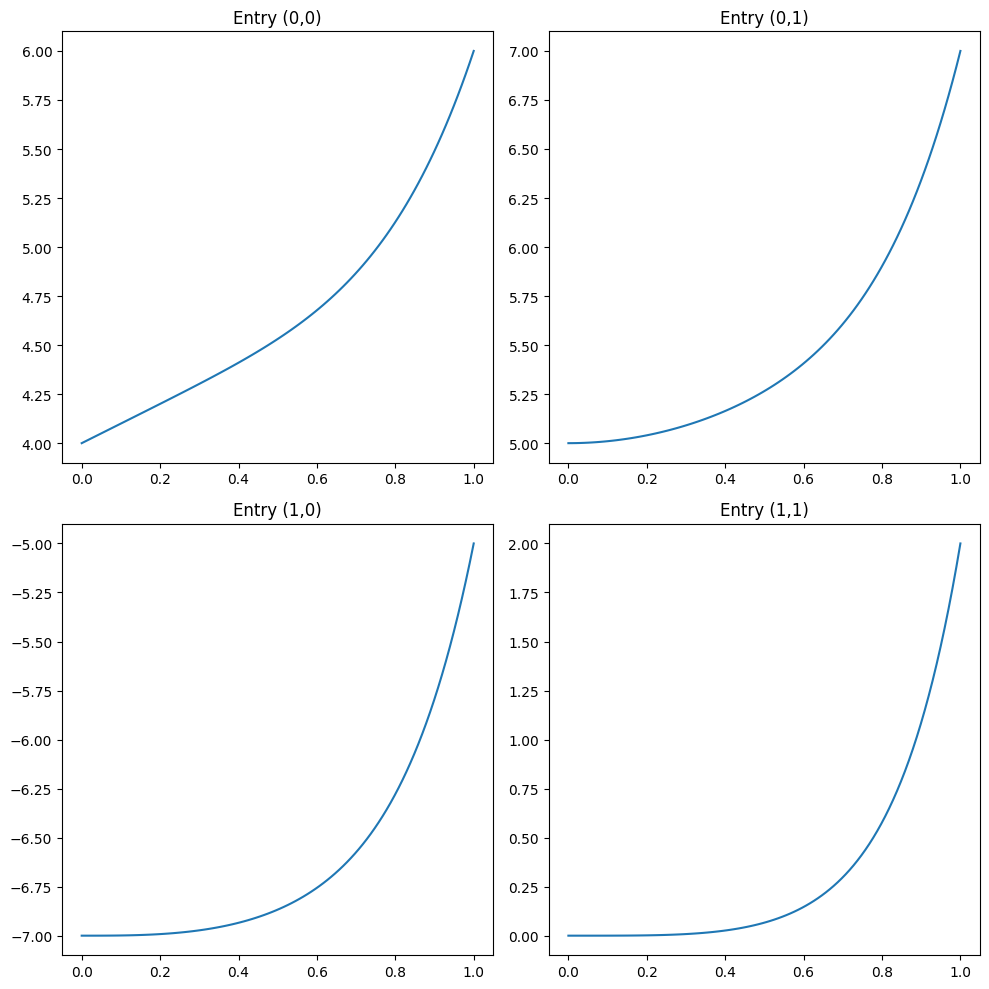

In [311]:
m1 = np.array([[lambda x: x, lambda x: x**2 +5 ], [lambda x: x**3, lambda x: x**4]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m3 = point_wise_operation(m1, m2, add_functions)
print(m3)


fig = plt.figure(figsize=(10,10))
gs = GridSpec(m3.shape[0], m3.shape[1], figure=fig)

x = np.linspace(0, 1, 100)  

for i in range(m3.shape[0]):
    for j in range(m3.shape[1]):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(x, m3[i, j](x))  
        ax.set_title(f'Entry ({i},{j})')

plt.tight_layout()
plt.show()

[[<function multiply_functions.<locals>.<lambda> at 0x00000176D7391700>
  <function multiply_functions.<locals>.<lambda> at 0x00000176D7391670>]
 [<function multiply_functions.<locals>.<lambda> at 0x00000176D73910D0>
  <function multiply_functions.<locals>.<lambda> at 0x00000176D7391790>]]


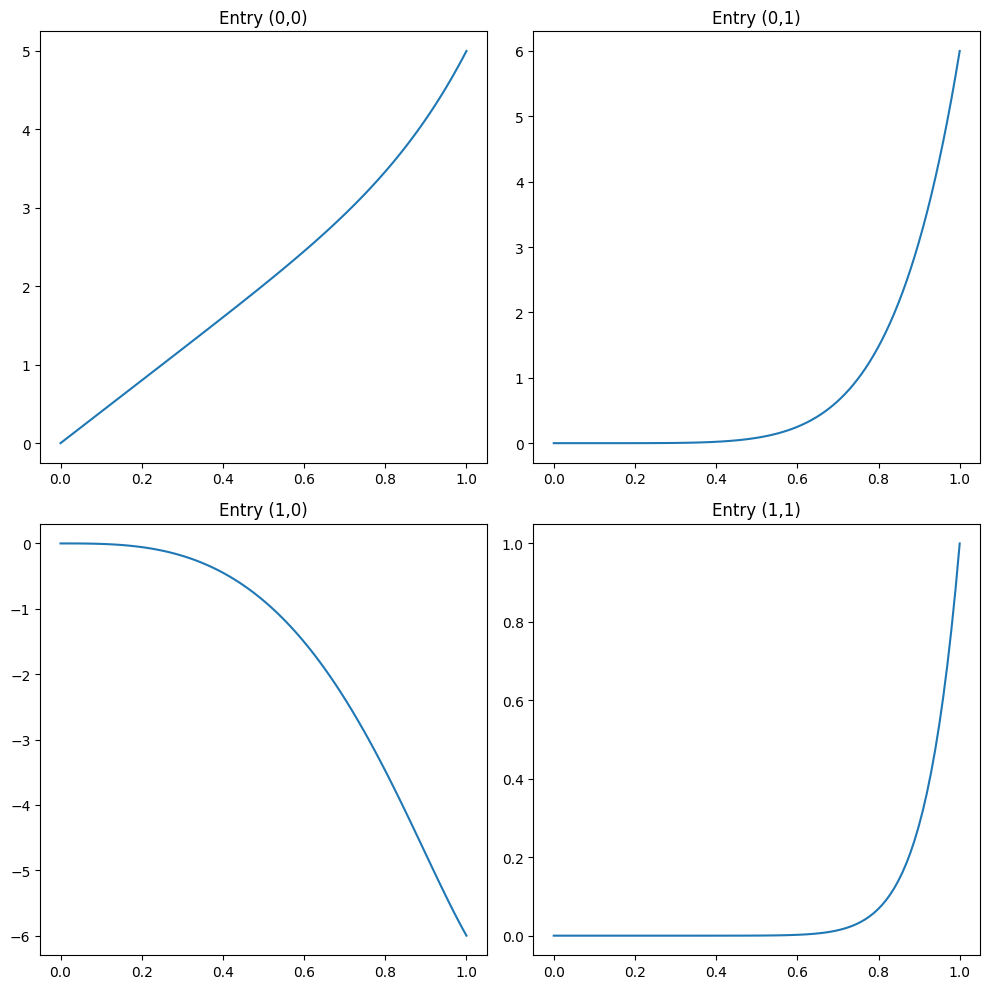

In [309]:
m1 = np.array([[lambda x: x, lambda x: x**2 +5 ], [lambda x: x**3, lambda x: x**4]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m5 = point_wise_operation(m1, m2, multiply_functions)
print(m5)

fig = plt.figure(figsize=(10,10))
gs = GridSpec(m5.shape[0], m5.shape[1], figure=fig)

x = np.linspace(0, 1, 100)  

for i in range(m5.shape[0]):
    for j in range(m5.shape[1]):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(x, m5[i, j](x)) 
        ax.set_title(f'Entry ({i},{j})')

plt.tight_layout()
plt.show()

Test part for matrices with differing dimensions:

The shapes of the two matrices you want to operate on, must be equivalent, which they are not.
[[<function add_functions.<locals>.<lambda> at 0x7f1f780c2560>
  <function add_functions.<locals>.<lambda> at 0x7f1f7c3b97e0>]
 [<function add_functions.<locals>.<lambda> at 0x7f1f7c3b8dc0>
  <function add_functions.<locals>.<lambda> at 0x7f1f7c3bbe20>]]


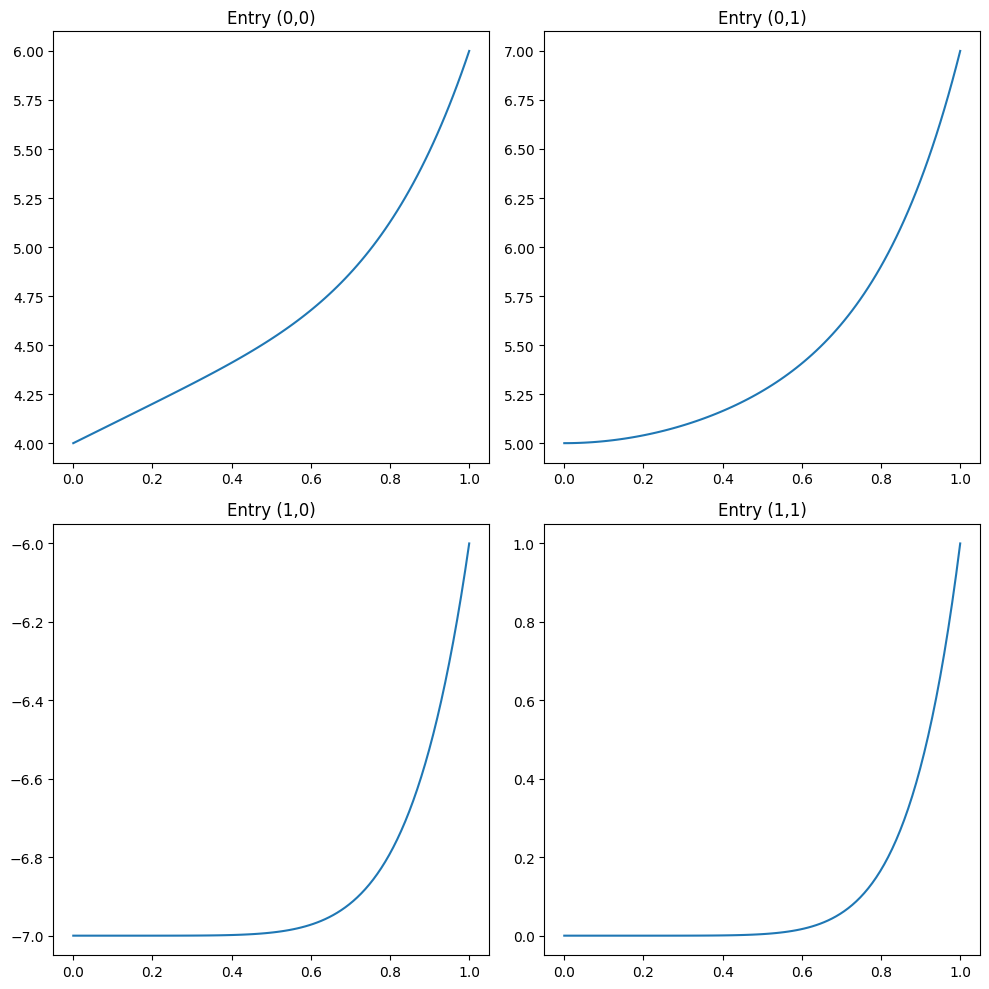

In [23]:
m4 = np.array([[lambda x: x, lambda x: x**2 +5 ]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m6 = point_wise_operation(m4, m2, add_functions)
print(m6)

fig = plt.figure(figsize=(10,10))
gs = GridSpec(m6.shape[0], m6.shape[1], figure=fig)

x = np.linspace(0, 1, 100)  

for i in range(m6.shape[0]):
    for j in range(m6.shape[1]):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(x, m6[i, j](x))  
        ax.set_title(f'Entry ({i},{j})')

plt.tight_layout()
plt.show()

The shapes of the two matrices you want to operate on, must be equivalent, which they are not.
[[<function multiply_functions.<locals>.<lambda> at 0x7f1f7a061120>
  <function multiply_functions.<locals>.<lambda> at 0x7f1f7a032dd0>
  <function multiply_functions.<locals>.<lambda> at 0x7f1f7a032d40>]
 [<function multiply_functions.<locals>.<lambda> at 0x7f1f7a032c20>
  <function multiply_functions.<locals>.<lambda> at 0x7f1f7a032cb0>
  <function multiply_functions.<locals>.<lambda> at 0x7f1f78079240>]]


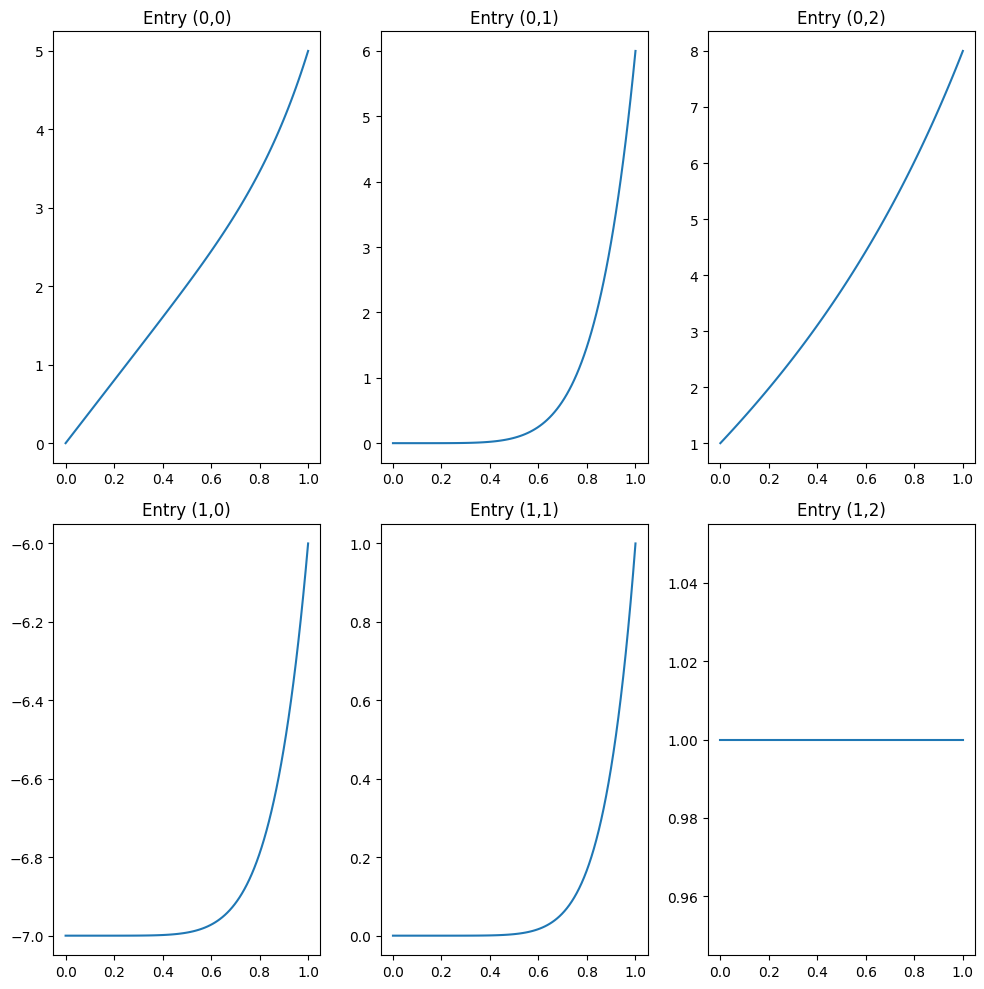

In [24]:
m4 = np.array([[lambda x: x, lambda x: x**2 +5, lambda x: x*3 + 5**x ]])
m2 = np.array([[lambda x: x**5 + 4, lambda x: x**6], [lambda x: x**7 -7, lambda x: x**8]])

m7 = point_wise_operation(m2, m4, multiply_functions)
print(m7)
fig = plt.figure(figsize=(10,10))
gs = GridSpec(m7.shape[0], m7.shape[1], figure=fig)

x = np.linspace(0, 1, 100) 

for i in range(m7.shape[0]):
    for j in range(m7.shape[1]):
        ax = fig.add_subplot(gs[i, j])
        ax.plot(x, m7[i, j](x))  
        ax.set_title(f'Entry ({i},{j})')

plt.tight_layout()
plt.show()

#### Implementation of function evaluation for such matrices

In [25]:
def evaluate_matrix(in_matrix: np.ndarray, x: float) -> np.ndarray or None:
    
    """This function takes a matrix of functions and a number x and returns a matrix 
        of the evaluation of the functions in the input matrix at x. In case the point_wise_operation
        did not return a matrix due to dimensions that don't match, evaluation won't be possible"""

    output = np.ndarray(shape=(len(in_matrix), len(in_matrix[0])), dtype=object)
    for i in range(len(in_matrix)):
        for j in range(len(in_matrix[0])):
            output[i][j] = in_matrix[i][j](x)
    return output

Test part:

[[38 73]
 [129 272]]


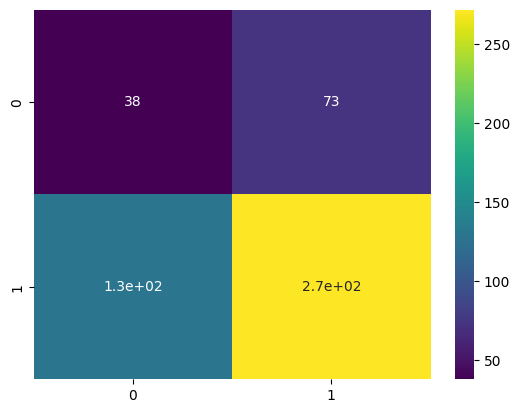

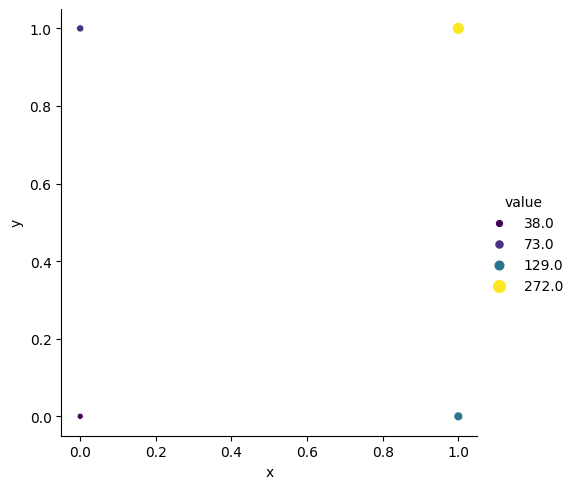

In [26]:
x = 2
print(evaluate_matrix(m3, x))

results = evaluate_matrix(m3, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


df = pd.DataFrame(results)


df = df.reset_index().melt(id_vars='index', var_name='y', value_name='value')


df.columns = ['x', 'y', 'value']


sns.relplot(data=df, x='x', y='y', size='value', hue='value', palette='viridis')
plt.show()

2D Graph Visualization

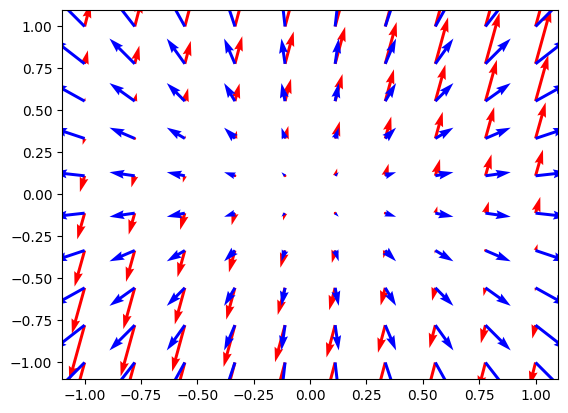

In [27]:
A = np.array([[38, 73],[129, 272]])

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)

U, V = np.dot(A, [X.flatten(), Y.flatten()])

plt.figure()
plt.quiver(X, Y, U-X.flatten(), V-Y.flatten(), color='r')
plt.quiver(X, Y, X, Y, color='b')
plt.show()

[[15645 468750]
 [9764750 244140625]]


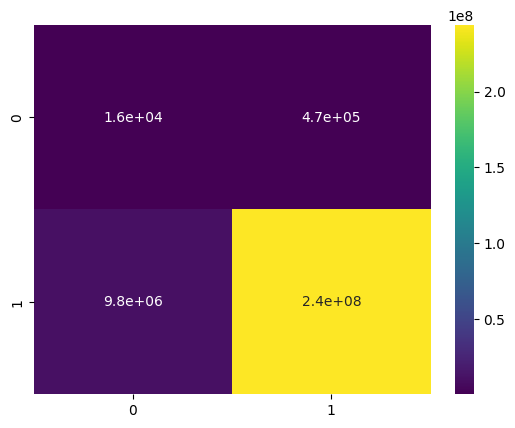

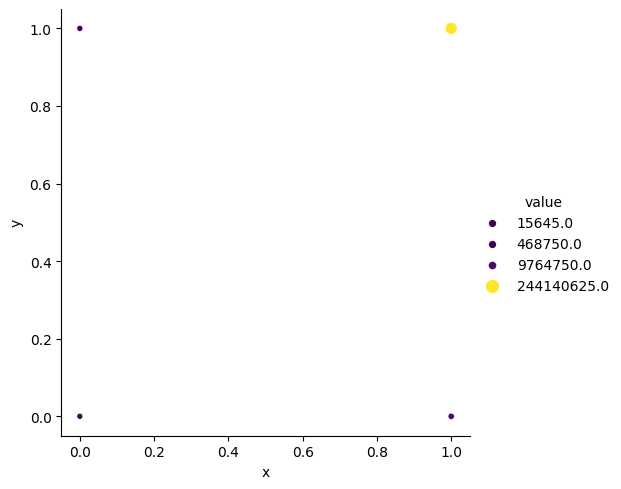

In [28]:
x = 5
print(evaluate_matrix(m5, x))

results = evaluate_matrix(m5, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


df = pd.DataFrame(results)


df = df.reset_index().melt(id_vars='index', var_name='y', value_name='value')


df.columns = ['x', 'y', 'value']


sns.relplot(data=df, x='x', y='y', size='value', hue='value', palette='viridis')
plt.show()

2D Graph Visualization

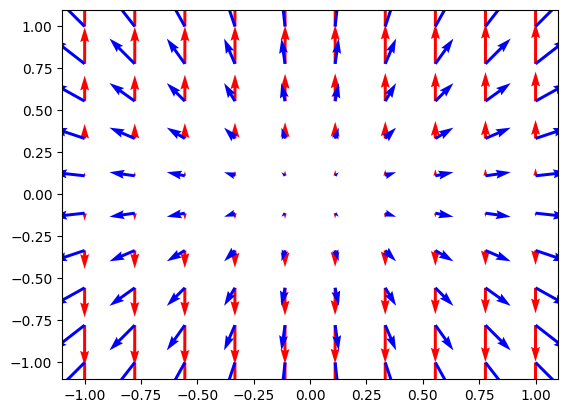

In [29]:
A = np.array([[15645, 468750],
 [9764750, 244140625]])

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)

U, V = np.dot(A, [X.flatten(), Y.flatten()])

plt.figure()
plt.quiver(X, Y, U-X.flatten(), V-Y.flatten(), color='r')
plt.quiver(X, Y, X, Y, color='b')
plt.show()

[[250 743]
 [2180 6561]]


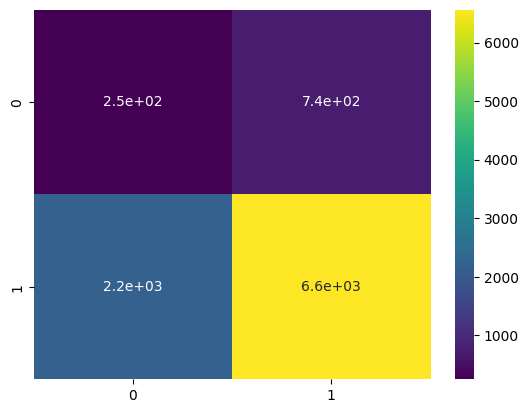

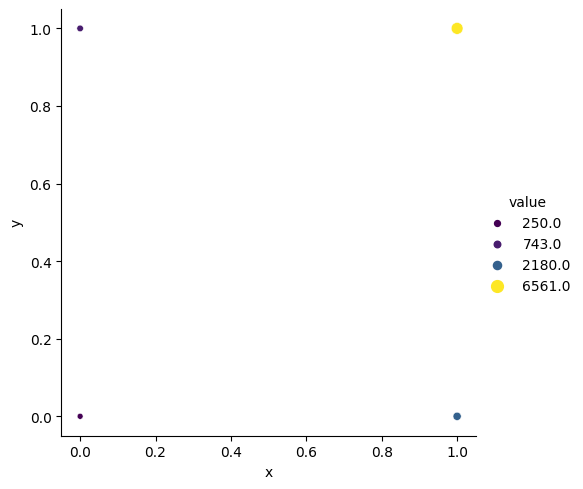

In [30]:
x = 3
print(evaluate_matrix(m6, x))

results = evaluate_matrix(m6, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


df = pd.DataFrame(results)


df = df.reset_index().melt(id_vars='index', var_name='y', value_name='value')


df.columns = ['x', 'y', 'value']


sns.relplot(data=df, x='x', y='y', size='value', hue='value', palette='viridis')
plt.show()

2D Graph Visualization

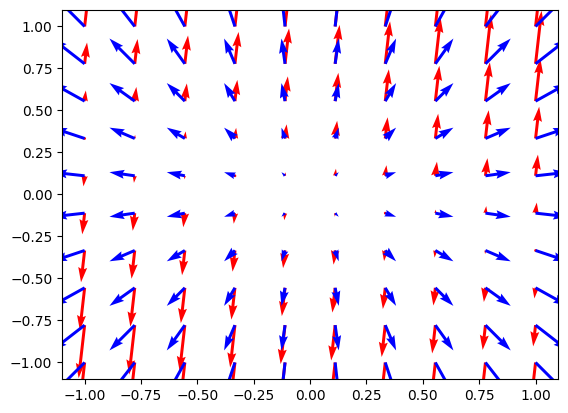

In [31]:
A = np.array([[250, 743],
 [2180,6561]])

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(x, y)

U, V = np.dot(A, [X.flatten(), Y.flatten()])

plt.figure()
plt.quiver(X, Y, U-X.flatten(), V-Y.flatten(), color='r')
plt.quiver(X, Y, X, Y, color='b')
plt.show()

[[72 576 31]
 [121 256 1]]


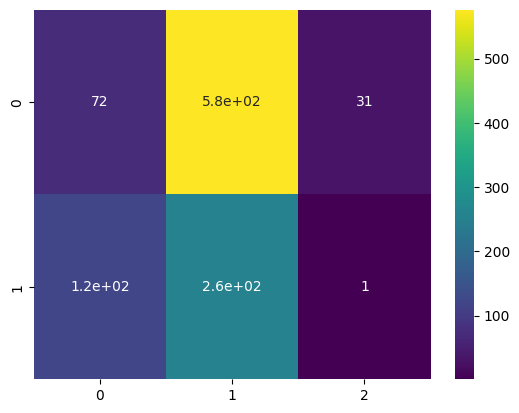

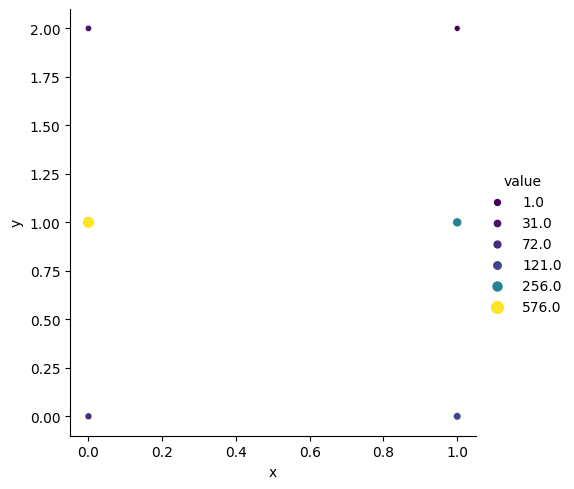

In [32]:
x = 2
print(evaluate_matrix(m7, x))

results = evaluate_matrix(m7, x)
results = results.astype(float)

sns.heatmap(results, annot=True, cmap='viridis')
plt.show()


df = pd.DataFrame(results)


df = df.reset_index().melt(id_vars='index', var_name='y', value_name='value')


df.columns = ['x', 'y', 'value']


sns.relplot(data=df, x='x', y='y', size='value', hue='value', palette='viridis')
plt.show()

2D Graph Visualization

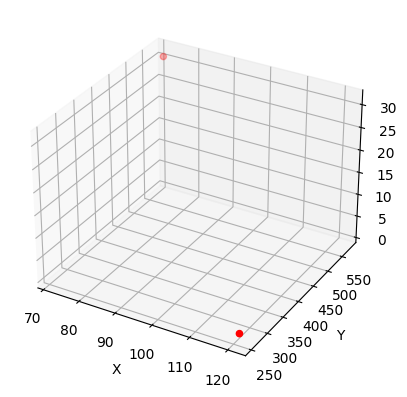

In [33]:
from mpl_toolkits.mplot3d import Axes3D


A = np.array([[72, 576, 31], [121, 256, 1]])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x_coords = [A[0,0], A[1,0]]
y_coords = [A[0,1], A[1,1]]
z_coords = [A[0,2], A[1,2]]

ax.scatter(x_coords, y_coords, z_coords, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()